Lazımlı kitabxalanların edirilməsi


1.   geopandas
2.   shapely
3.   matplotlib
4.   contextily
5.   folium
6.   seaborn







In [ ]:
pip install geopandas shapely matplotlib contextily folium seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.0 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

In [ ]:
# Shapefile oxuyuruq
shp_path = "/content/drive/MyDrive/Geopandas ve Pandas/OSM/Buildings.shp"
shape_building_data = gpd.read_file(shp_path)

In [ ]:
# Datalari umumi olaraq goruntuleyirik  head() funksiyasi ile
shape_building_data.head(10) # 10 setrini goruntuleyirik.isteye uygun olaraq deyise bilerik

,osm_id,code,fclass,name,type,geometry
0,21254082,1500,building,None,None,"POLYGON ((49.47149 40.56111, 49.47175 40.56141..."
1,25359715,1500,building,Muzey Mərkəzi,None,"POLYGON ((49.84216 40.36977, 49.84274 40.37005..."
2,25402557,1500,building,Bakı Dəniz Vağzalı,None,"POLYGON ((49.85642 40.37322, 49.85737 40.37345..."
3,42802093,1500,building,None,None,"POLYGON ((49.84361 40.42675, 49.84361 40.42689..."
4,42857610,1500,building,None,None,"POLYGON ((49.84485 40.42699, 49.84485 40.42711..."
5,42857611,1500,building,None,None,"POLYGON ((49.84441 40.42499, 49.84442 40.42513..."
6,42857612,1500,building,91,apartments,"POLYGON ((49.84244 40.42422, 49.84247 40.42512..."
7,42858978,1500,building,192,apartments,"POLYGON ((49.83849 40.4238, 49.83887 40.42433,..."
8,42858979,1500,building,34,apartments,"POLYGON ((49.83885 40.42358, 49.83895 40.42373..."
9,42858981,1500,building,87,apartments,"POLYGON ((49.84016 40.42364, 49.84016 40.42376..."


In [ ]:
# Koordinant sistemi haqqinda umumi melumat elde edirik
shape_building_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Eger koordinant sistemi yoxdursa ve ya yaxud basqa koordinant sistemindedirse oz zonamiza uygun olaraq deyise bilerik
shape_building_data.to_crs(epsg = 4326)

,osm_id,code,fclass,name,type,geometry
0,21254082,1500,building,None,None,"POLYGON ((49.47149 40.56111, 49.47175 40.56141..."
1,25359715,1500,building,Muzey Mərkəzi,None,"POLYGON ((49.84216 40.36977, 49.84274 40.37005..."
2,25402557,1500,building,Bakı Dəniz Vağzalı,None,"POLYGON ((49.85642 40.37322, 49.85737 40.37345..."
3,42802093,1500,building,None,None,"POLYGON ((49.84361 40.42675, 49.84361 40.42689..."
4,42857610,1500,building,None,None,"POLYGON ((49.84485 40.42699, 49.84485 40.42711..."
...,...,...,...,...,...,...
81273,898084766,1500,building,None,None,"POLYGON ((47.36076 40.99995, 47.3616 40.99998,..."
81274,898084768,1500,building,None,None,"POLYGON ((47.35924 41.00012, 47.35952 41.00042..."
81275,898084770,1500,building,None,None,"POLYGON ((47.35971 40.99488, 47.35979 40.99505..."
81276,898086045,1500,building,None,None,"POLYGON ((47.15558 41.07797, 47.15574 41.07803..."


In [ ]:
# Deyisdirdiyimiz koordinant sistemini yeniden yoxlayiriq
shape_building_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Məlumat Strukturu və Statistikası

In [ ]:
# Sutunlari yoxlayiriq
print(shape_building_data.columns)

Index(['osm_id', 'code', 'fclass', 'name', 'type', 'geometry'], dtype='object')


In [ ]:
# Umumi shapefile haqqinda melumat elde edirik
print(shape_building_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81278 entries, 0 to 81277
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osm_id    81278 non-null  object  
 1   code      81278 non-null  int32   
 2   fclass    81278 non-null  object  
 3   name      2490 non-null   object  
 4   type      29302 non-null  object  
 5   geometry  81278 non-null  geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 3.4+ MB
None


In [ ]:
# Data haqqinda statistik netilere baxa bilerik
print(shape_building_data.describe())

          code
count  81278.0
mean    1500.0
std        0.0
min     1500.0
25%     1500.0
50%     1500.0
75%     1500.0
max     1500.0


In [ ]:
# Bos deyerleri kontrol edirik
# Statistikadan goruruk ki, name ve type sutununda  null deyerler var
print(shape_building_data.isnull().sum())

osm_id          0
code            0
fclass          0
name        78788
type        51976
geometry        0
dtype: int64


In [ ]:
# Telebe uygun olaraq bos deyerleri sile ve ya  basqa melumatlarla doldura bilerik
shape_building_data = shape_building_data.dropna(subset = ['geometry']) # Bos geometry deyerleri silirik
shape_building_data['name'] = shape_building_data['name'].fillna('Unknown')  # Bos adlari 'Unknown' ile evez edirik

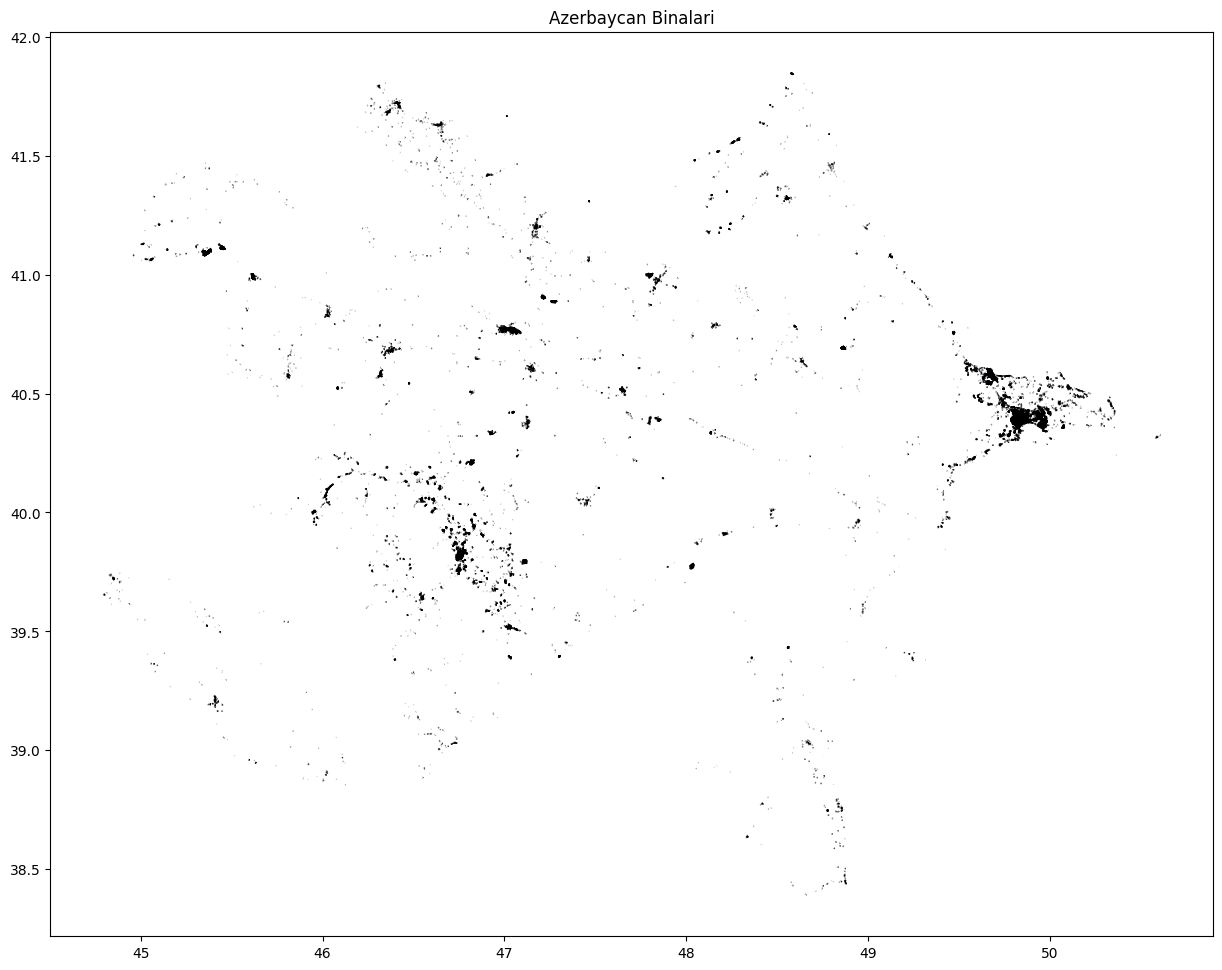

In [ ]:
# Umumi olaraq datani xeritede vizuallasdiririq
import matplotlib.pyplot as plt

shape_building_data.plot(figsize=(15, 15), color='blue', alpha=0.5, edgecolor='black')
plt.title("Azerbaycan Binalari")
plt.show()

In [ ]:
# Her binanin sahesini hesablayaq
shape_building_data['area'] = shape_building_data.geometry.area
print(shape_building_data[['name', 'area']].head())

                 name          area
0             Unknown  6.071791e-08
1       Muzey Mərkəzi  2.732948e-07
2  Bakı Dəniz Vağzalı  3.808418e-07
3             Unknown  3.295200e-08
4             Unknown  1.430114e-07


<ipython-input-22-8edc22b3cfdb>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_building_data['area'] = shape_building_data.geometry.area


In [ ]:
# Ortalama binalarin sahesini ve umumi bina sayini hesablayiriq
print("Ortalama bina sahesi:", shape_building_data['area'].mean())
print("Binalarin umumi sayi:", len(shape_building_data))

Ortalama bina sahesi: 5.47161397946564e-08
Binalarin umumi sayi: 81278


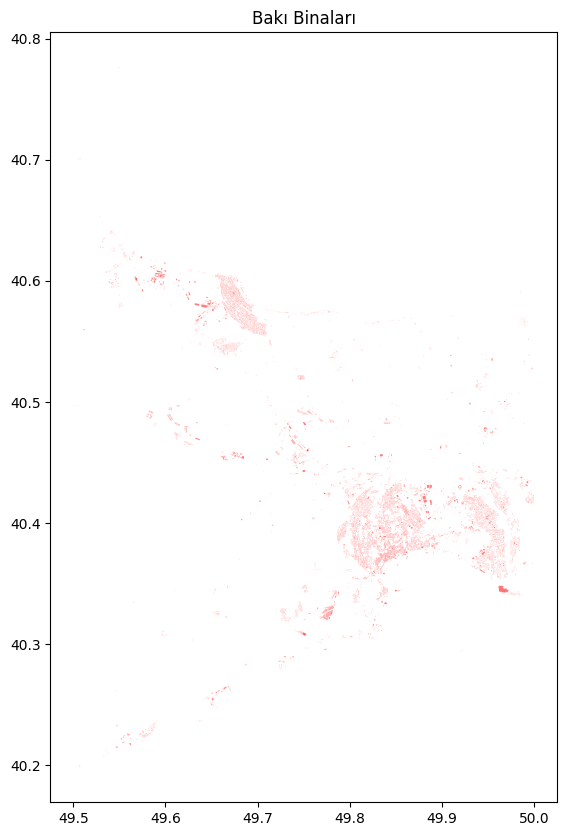

In [ ]:
# Baki seheri uzre binalarin secmek ve analiz etmek
baku_buildings = shape_building_data.cx[49.5:50, 40:41]  # Baki uzre koordinant deyerleri
baku_buildings.plot(figsize=(10, 10), color='red', alpha=0.5)
plt.title("Bakı Binaları")
plt.show()

In [ ]:
# Datada en boyuk binani tapmaq
largest_building = shape_building_data.loc[shape_building_data['area'].idxmax()]
print(largest_building)
# Neticeden gorunur ki  bu datada en boyuk bina  Heydər Əliyev adına Ali Hərbi Məktəb -dir

osm_id                                              323398478
code                                                     1500
fclass                                               building
name                     Heydər Əliyev adına Ali Hərbi Məktəb
type                                               university
geometry    POLYGON ((49.9620071 40.3456715, 49.9645784 40...
area                                                 0.000029
Name: 21838, dtype: object


In [ ]:
# Datada en kicik  binani tapmaq
smallest_building = shape_building_data.loc[shape_building_data['area'].idxmin()]
print(smallest_building)

osm_id                                               552234320
code                                                      1500
fclass                                                building
name                                                   Unknown
type                                                industrial
geometry     POLYGON ((49.3888429 39.9403322, 49.388843 39....
area                                                       0.0
perimeter                                              0.00004
Name: 50838, dtype: object


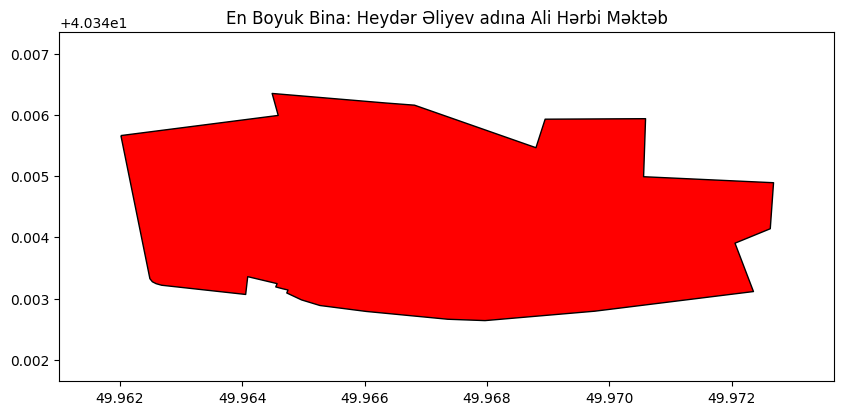

In [ ]:
# En boyuk binani vizuallasdiraq
fig, ax = plt.subplots(figsize=(10, 10))

largest_gdf.plot(ax=ax, color='red', edgecolor='black')

# Zoom üçün limitləri təyin et
minx, miny, maxx, maxy = largest_building.geometry.bounds
ax.set_xlim(minx - 0.001, maxx + 0.001)
ax.set_ylim(miny - 0.001, maxy + 0.001)

plt.title(f"En Boyuk Bina: {largest_building['name']}")
plt.show()

In [ ]:
# Mueyyen adlari olan binalari secmek
named_buildings = shape_building_data[shape_building_data['name'].notnull()]
print(named_buildings[['name', 'geometry']])

                     name                                           geometry
0                 Unknown  POLYGON ((49.47149 40.56111, 49.47175 40.56141...
1           Muzey Mərkəzi  POLYGON ((49.84216 40.36977, 49.84274 40.37005...
2      Bakı Dəniz Vağzalı  POLYGON ((49.85642 40.37322, 49.85737 40.37345...
3                 Unknown  POLYGON ((49.84361 40.42675, 49.84361 40.42689...
4                 Unknown  POLYGON ((49.84485 40.42699, 49.84485 40.42711...
...                   ...                                                ...
81273             Unknown  POLYGON ((47.36076 40.99995, 47.3616 40.99998,...
81274             Unknown  POLYGON ((47.35924 41.00012, 47.35952 41.00042...
81275             Unknown  POLYGON ((47.35971 40.99488, 47.35979 40.99505...
81276             Unknown  POLYGON ((47.15558 41.07797, 47.15574 41.07803...
81277             Unknown  POLYGON ((47.15559 41.07717, 47.1557 41.07721,...

[81278 rows x 2 columns]


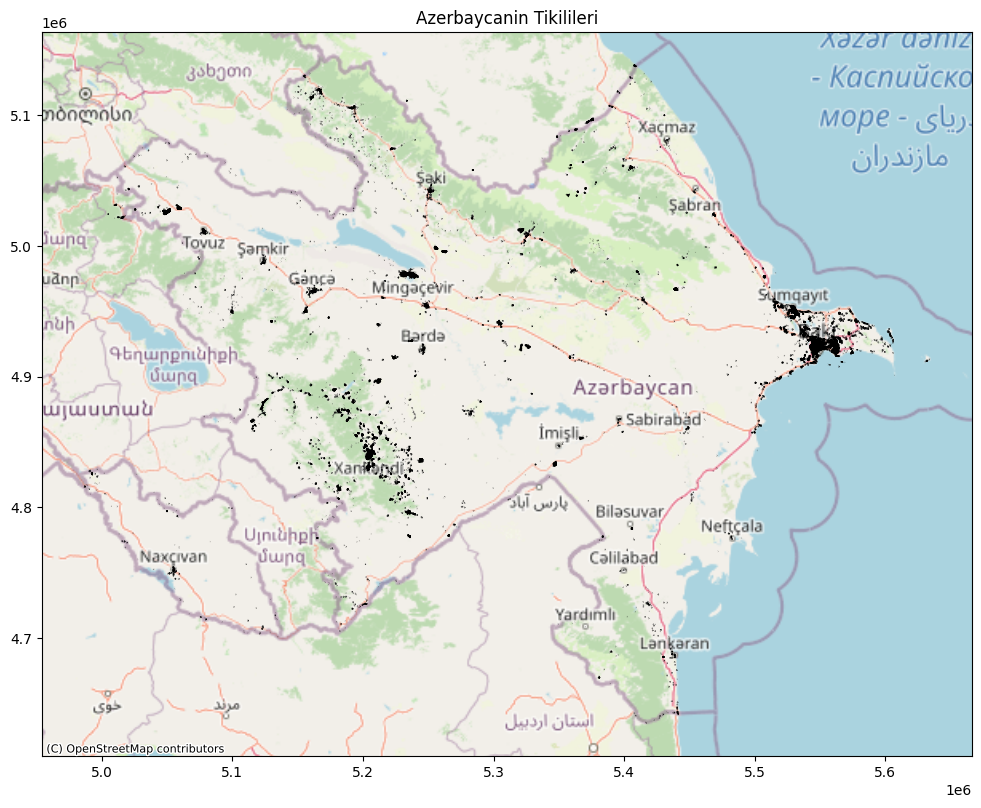

In [ ]:
# Contextily  kitabxansi ile  osm basemap elave edirik
fig, ax = plt.subplots(figsize=(12, 12))
shape_building_data.to_crs(epsg=3857).plot(ax=ax, edgecolor="black", alpha=0.5)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # OSM xeritesi
plt.title("Azerbaycanin Tikilileri")
plt.show()

In [ ]:
# Folium kitabxanasi ile interaktiv xerite yarada bilerik
import folium

# Merkez koordinanti tapiriq
center = [shape_building_data.geometry.centroid.y.mean(), shape_building_data.geometry.centroid.x.mean()]

m = folium.Map(location=center, zoom_start=10)

# Her binani xeriteye elave  edirik
for _, row in shape_building_data.iterrows():
    folium.GeoJson(row["geometry"]).add_to(m)

m.save("azerbaijan_buildings_map.html")
print("Xəritə yaradıldı: azerbaijan_buildings_map.html")

<ipython-input-30-6c8a6f656965>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [shape_building_data.geometry.centroid.y.mean(), shape_building_data.geometry.centroid.x.mean()]


Xəritə yaradıldı: azerbaijan_buildings_map.html


In [ ]:
# Dataya perimeter sutunu elave edirik
shape_building_data["perimeter"] = shape_building_data.geometry.length

<ipython-input-31-35fb440d8349>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_building_data["perimeter"] = shape_building_data.geometry.length


In [ ]:
shape_building_data.head()

,osm_id,code,fclass,name,type,geometry,area,perimeter
0,21254082,1500,building,Unknown,None,"POLYGON ((49.47149 40.56111, 49.47175 40.56141...",6.071791e-08,0.001102
1,25359715,1500,building,Muzey Mərkəzi,None,"POLYGON ((49.84216 40.36977, 49.84274 40.37005...",2.732948e-07,0.002163
2,25402557,1500,building,Bakı Dəniz Vağzalı,None,"POLYGON ((49.85642 40.37322, 49.85737 40.37345...",3.808418e-07,0.002745
3,42802093,1500,building,Unknown,None,"POLYGON ((49.84361 40.42675, 49.84361 40.42689...",3.295200e-08,0.000748
4,42857610,1500,building,Unknown,None,"POLYGON ((49.84485 40.42699, 49.84485 40.42711...",1.430114e-07,0.002698


In [ ]:
# Binalarin kvadrat, duzbucaqli ve ya ferqli formalarda olub-olmadigini yoxlamaq ucun compactness index hesablaya bilerik:
shape_building_data["compactness"] = (4 * 3.1416 * shape_building_data["area"]) / (shape_building_data["perimeter"] ** 2)
print(shape_building_data[["compactness"]].describe())

        compactness
count  81278.000000
mean       0.650629
std        0.149335
min        0.036212
25%        0.584088
50%        0.710482
75%        0.756049
max        0.971485


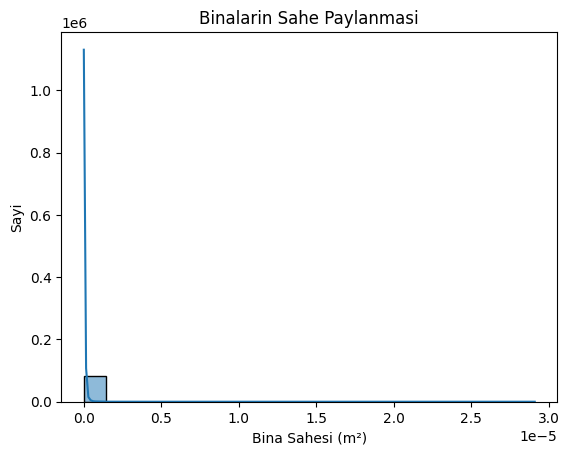

In [43]:
sns.histplot(shape_building_data["area"], bins=20, kde=True)
plt.xlabel("Bina Sahesi (m²)")
plt.ylabel("Sayi")
plt.title("Binalarin Sahe Paylanmasi")
plt.show()

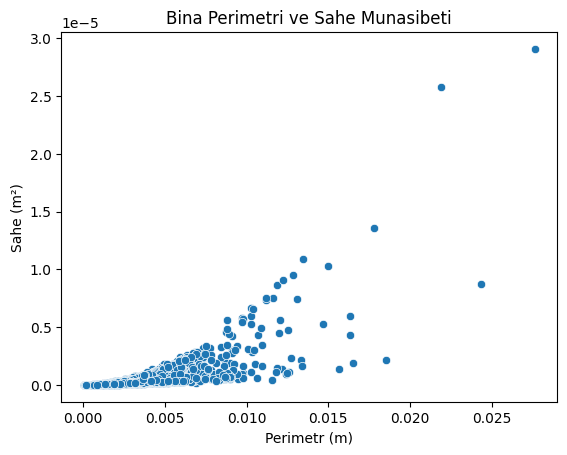

In [45]:
# Binalarin uzunlugu ve eni arasinda elaqeni yoxlaya bilerik
sns.scatterplot(x=shape_building_data["perimeter"], y=shape_building_data["area"])
plt.xlabel("Perimetr (m)")
plt.ylabel("Sahe (m²)")
plt.title("Bina Perimetri ve Sahe Munasibeti")
plt.show()

In [46]:
shape_building_data.head()

,osm_id,code,fclass,name,type,geometry,area,perimeter,compactness
0,21254082,1500,building,Unknown,None,"POLYGON ((49.47149 40.56111, 49.47175 40.56141...",6.071791e-08,0.001102,0.628148
1,25359715,1500,building,Muzey Mərkəzi,None,"POLYGON ((49.84216 40.36977, 49.84274 40.37005...",2.732948e-07,0.002163,0.734116
2,25402557,1500,building,Bakı Dəniz Vağzalı,None,"POLYGON ((49.85642 40.37322, 49.85737 40.37345...",3.808418e-07,0.002745,0.635104
3,42802093,1500,building,Unknown,None,"POLYGON ((49.84361 40.42675, 49.84361 40.42689...",3.295200e-08,0.000748,0.739777
4,42857610,1500,building,Unknown,None,"POLYGON ((49.84485 40.42699, 49.84485 40.42711...",1.430114e-07,0.002698,0.246920


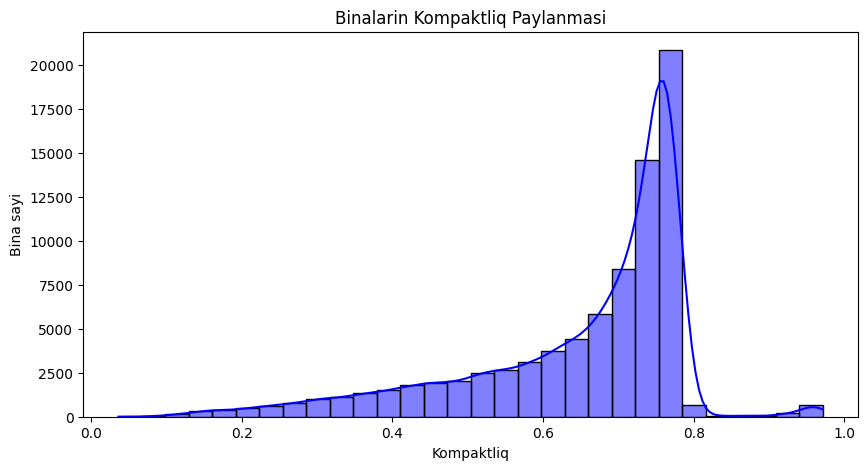

In [48]:
# Binalarin geometrik formasina gore (kompaktligini)analizler apara bilerik
plt.figure(figsize=(10, 5))
sns.histplot(shape_building_data['compactness'], bins=30, kde=True, color='blue')
plt.xlabel('Kompaktliq')
plt.ylabel('Bina sayi')
plt.title('Binalarin Kompaktliq Paylanmasi')
plt.show()

In [51]:
# Taninmayan  (Unknown) binalarin sayini cixaraq
unknown_buildings = shape_building_data[shape_building_data['name'] == 'Unknown']
print(f"Taninmayan binalarin sayi: {len(unknown_buildings)}")

Taninmayan binalarin sayi: 78788


size_category
Kiçik    70880
Orta      9746
Böyük      396
Name: count, dtype: int64


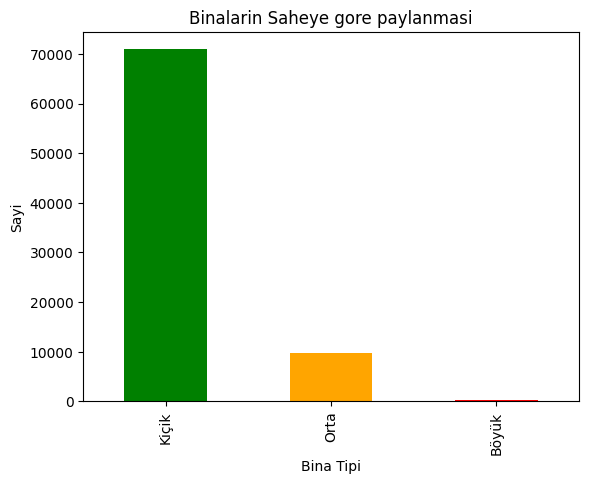

In [54]:
# Binalari olcusune gore 3 qrupa boluruk : kicik ,orta ve boyuk
import pandas as pd
shape_building_data['size_category'] = pd.cut(shape_building_data['area'],
                                              bins=[0, 1e-7, 5e-7, 1e-6],
                                              labels=['Kiçik', 'Orta', 'Böyük'])

print(shape_building_data['size_category'].value_counts())

shape_building_data['size_category'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.xlabel('Bina Tipi')
plt.ylabel('Sayi')
plt.title('Binalarin Saheye gore paylanmasi')
plt.show()

In [55]:
# En qeyri adi qurulusa malik binalarin sayini cixaraq
least_compact_buildings = shape_building_data.nsmallest(5, 'compactness')
print(least_compact_buildings[['name', 'compactness']])

          name  compactness
40609  Unknown     0.036212
79351  Unknown     0.037225
8019   Unknown     0.042185
4309   Unknown     0.052357
8021   Unknown     0.065874


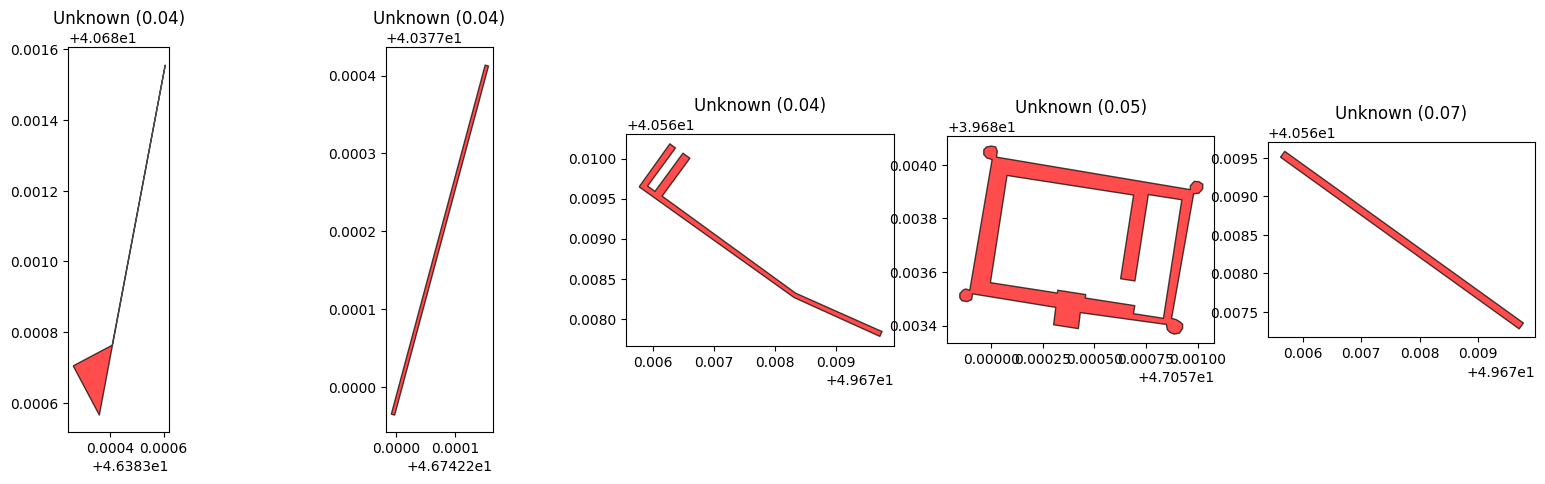

In [57]:
# En qeyri adi qurulusa malik binalari tek tek vizuallasdiraq
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, (idx, row) in enumerate(least_compact_buildings.iterrows()):
    ax = axes[i]
    gdf.iloc[[idx]].plot(ax=ax, color='red', alpha=0.7, edgecolor='black')
    ax.set_title(f"{row['name']} ({row['compactness']:.2f})")

plt.show()

Azərbaycanda yerləşən  məscid,qəbiristanlıq və kilsə datalarının geometrik  analiz edilməsi

In [63]:
mqk_path = '/content/drive/MyDrive/Geopandas ve Pandas/OSM/Kilse/Kilse_Qebirstanliq_Mescid.shp'
data = gpd.read_file(mqk_path)

In [65]:
data.head(15)

,osm_id,code,fclass,name,geometry
0,65410450,3300,muslim,Qurd Qapısı qəbirstanlığı 1,"POLYGON ((49.78717 40.3577, 49.78826 40.35755,..."
1,65410455,3300,muslim,Qurd Qapısı qəbirstanlığı 2,"POLYGON ((49.78559 40.36376, 49.7856 40.36466,..."
2,147518548,3300,muslim,Corat qəbirstanlığı,"POLYGON ((49.71749 40.57406, 49.71925 40.57398..."
3,151230509,3300,muslim,Mərdəkan Qəbiristanlığı,"POLYGON ((50.13476 40.4925, 50.13588 40.49253,..."
4,151810701,3300,muslim,Məscid,"POLYGON ((49.97306 40.40215, 49.97308 40.40256..."
5,152178946,3300,muslim,Bibi Heybət qəbirstanlığı,"POLYGON ((49.8135 40.30331, 49.81598 40.30555,..."
6,152297233,3302,muslim_shia,Qaravəlli kənd qəbristanlığı,"POLYGON ((48.20962 39.90517, 48.20972 39.90545..."
7,152429181,3300,muslim,Yasamal Qəbiristanlığı,"POLYGON ((49.80411 40.3715, 49.80433 40.3715, ..."
8,152595656,3300,muslim,Fatimei Zahra,"POLYGON ((49.97862 40.38099, 49.97871 40.38126..."
9,152815646,3300,muslim,Hüseyniyyə məscidi,"POLYGON ((49.8488 40.39045, 49.84895 40.39049,..."


In [66]:
# Datasetin esas melumatlarini yoxlayaq
data.shape
# Buradan gorunur ki  datamizda  5 sutun ve 625 setirimiz var

(625, 5)

In [67]:
# Sutunlarimizin data tipleri haqqinda melumat elde edek

data.dtypes

,0
osm_id,object
code,int32
fclass,object
name,object
geometry,geometry


In [68]:
# Bu analiz datasetdəki ədədi dəyərlərin minimum, maksimum, orta və digər statistik göstəricilərini çıxaracaq.
data.describe()

,code
count,625.000000
mean,3288.086400
std,47.255771
min,3100.000000
25%,3300.000000
50%,3300.000000
75%,3300.000000
max,3302.000000


In [69]:
# Her sutuna gore unikal deyerlerin sayini cixaririq
data.nunique()

,0
osm_id,625
code,7
fclass,7
name,230
geometry,625


In [71]:
# fclass ve name sutunlarinin sayini cixaraq
print(data['fclass'].value_counts())
print(data['name'].value_counts())

fclass
muslim                568
christian              33
muslim_shia            15
muslim_sunni            4
christian_lutheran      2
christian_orthodox      2
jewish                  1
Name: count, dtype: int64
name
Qəbirstanlıq              349
Qəbiristanlıq              19
Məscid                      8
Cümə Məscidi                4
Köhnə qəbirstanlıq          3
                         ... 
Gülzanbinə ziyarətgahı      1
Şəhidlər Xiyabanı           1
Müsəlman Qəbirstanlığı      1
Oğuz qəbirstanlığı          1
Azadlıq Məscidi             1
Name: count, Length: 230, dtype: int64


In [72]:
# Her obyektin  sahesini hesablayaq
data['area'] = data.geometry.area

<ipython-input-72-5f0236dd9908>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['area'] = data.geometry.area


In [73]:
# Dataya perimeter sutunu elave edirik
data["perimeter"] = data.geometry.length


<ipython-input-73-145ab517f215>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data["perimeter"] = data.geometry.length


In [74]:
# Obyektlerin kvadrat, duzbucaqli ve ya ferqli formalarda olub-olmadigini yoxlamaq ucun compactness index hesablaya bilerik:
data["compactness"] = (4 * 3.1416 * data["area"]) / (data["perimeter"] ** 2)
print(data[["compactness"]].describe())

       compactness
count   625.000000
mean      0.673960
std       0.131556
min       0.163480
25%       0.611694
50%       0.710001
75%       0.764101
max       0.964198


In [75]:
# Datada olan en boyuk 5 obyekti cixaririq
largest_objects = data.nlargest(5, 'area')
print(largest_objects[['name', 'area']])

                             name      area
31  Sumqayıt Şəhər Qəbiristanlığı  0.000061
7          Yasamal Qəbiristanlığı  0.000059
22        Xırdalan qəbiristanlığı  0.000041
56          Qəbirstanlıq Şəhriyar  0.000037
36         Mehdiabad qəbirsanlığı  0.000030


In [76]:
# En az kompakt obyektləri müeyyen edirik
least_compact_objects = data.nsmallest(5, 'compactness')
print(least_compact_objects[['name', 'compactness']])

                                                  name  compactness
64   The Church of the Virgin Mary’s Immaculate Con...     0.163480
156                            Badamdar Qəbiristanlığı     0.177200
106                             Buzovna Qəbiristanlığı     0.180777
19                             Biləcəri Qəbiristanlığı     0.183977
5                            Bibi Heybət qəbirstanlığı     0.194183


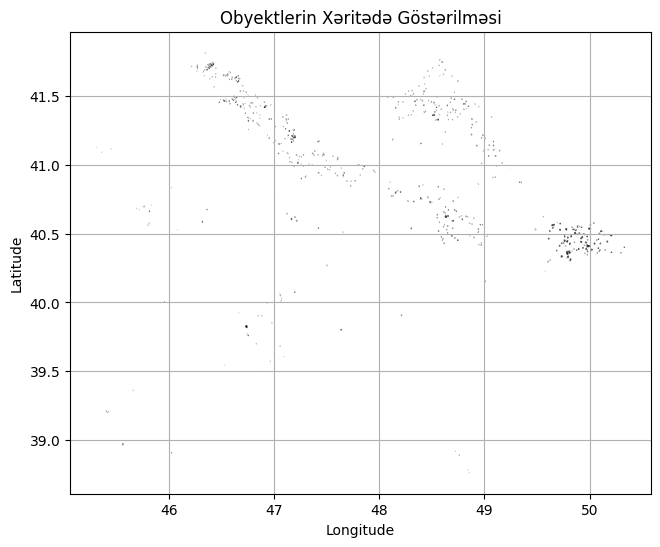

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Eger DataFrame adi pandas DataFrame-dirse, GeoDataFrame-e ceviririk
if not isinstance(data, gpd.GeoDataFrame):
    data = gpd.GeoDataFrame(data, geometry='geometry')

# Vizualizasiya
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(ax=ax, markersize=5, color='blue', edgecolor='black', alpha=0.6)

plt.title("Obyektlerin Xəritədə Göstərilməsi")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [93]:
largest_buildings = data.nlargest(5, 'area')  # En boyuk 5 obyekt
smallest_buildings = data.nsmallest(5, 'area')  # En kicik 5 obyekt

print("En boyuk 5 obyekt:")
print(largest_buildings[['name', 'area']])

print("\nEn kicik 5 obyekt:")
print(smallest_buildings[['name', 'area']])


En boyuk 5 obyekt:
                             name      area
31  Sumqayıt Şəhər Qəbiristanlığı  0.000061
7          Yasamal Qəbiristanlığı  0.000059
22        Xırdalan qəbiristanlığı  0.000041
56          Qəbirstanlıq Şəhriyar  0.000037
36         Mehdiabad qəbirsanlığı  0.000030

En kicik 5 obyekt:
                                    name          area
215                         Nəzir qutusu  3.021490e-09
222                       Mknatami Khach  6.660000e-09
132                               Məscid  8.755125e-09
191                        Kyatuk Church  1.104378e-08
134  Xıdır Zində ziyarətgahındakı məscid  1.243036e-08


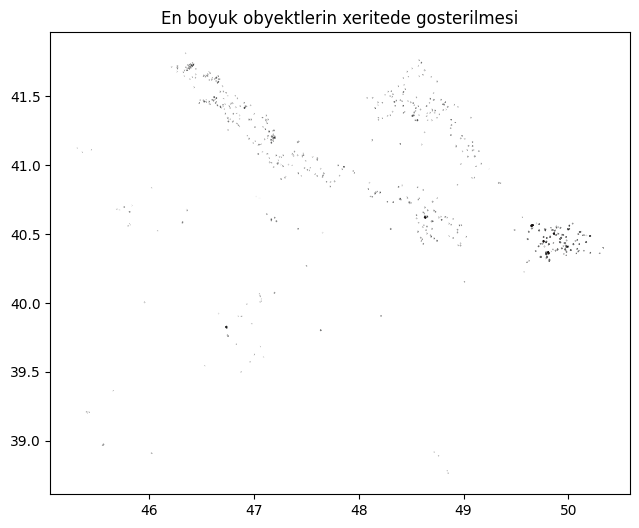

In [94]:
# Onlari vizualizasiya edirik
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.6)
largest_buildings.plot(ax=ax, color='red', edgecolor='black', alpha=0.8)
plt.title("En boyuk obyektlerin xeritede gosterilmesi")
plt.show()

 Kompaktliq (Compactness) Analizi
 Kompaktliq bir obyektin sahesi ile perimetri arasindaki nisbetdir. Kompakt olmayan (qeyri-adi formali) obyektleri tapmaq ucun bunu hesablaya bilerik


In [95]:
data['perimeter'] = data.geometry.length  # Perimetri hesabla
data['compactness'] = (4 * 3.14159 * data['area']) / (data['perimeter'] ** 2)

least_compact_buildings = data.nsmallest(5, 'compactness')
most_compact_buildings = data.nlargest(5, 'compactness')

print("Ən qeyri-muntezem (kompaktsiz) 5 obyekt:")
print(least_compact_buildings[['name', 'compactness']])

print("\nEn müntEzEm (kompakt) 5 obyekt:")
print(most_compact_buildings[['name', 'compactness']])

Ən qeyri-muntezem (kompaktsiz) 5 obyekt:
                                                  name  compactness
64   The Church of the Virgin Mary’s Immaculate Con...     0.163479
156                            Badamdar Qəbiristanlığı     0.177199
106                             Buzovna Qəbiristanlığı     0.180776
19                             Biləcəri Qəbiristanlığı     0.183976
5                            Bibi Heybət qəbirstanlığı     0.194182

En müntEzEm (kompakt) 5 obyekt:
                                    name  compactness
134  Xıdır Zində ziyarətgahındakı məscid     0.964195
132                               Məscid     0.962862
131                               Məscid     0.962791
107                 Cümə Məscidi Buzovna     0.961290
621                         Qəbirstanlıq     0.921687


<ipython-input-95-10387e729a5a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['perimeter'] = data.geometry.length  # Perimetri hesabla


<ipython-input-96-248fc0ae2ffc>:7: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = gpd.GeoDataFrame(geometry=[data.unary_union.convex_hull.buffer(0.01)]);
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:2391: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


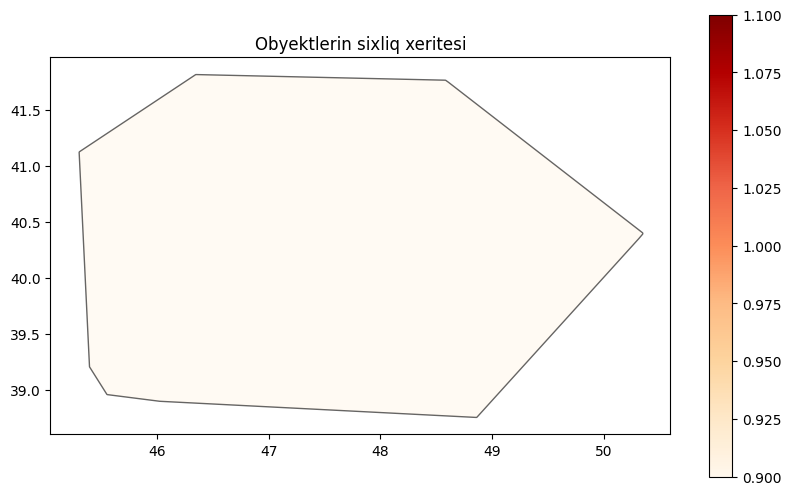

In [96]:
# Binalarin Sixligi (Density) Analizi
# Eger obyeklter cografi erazilere gore paylanibsa, onlarin sixligini hesablaya bilerik

from geopandas.tools import sjoin;

# Poliqonlari mueyyen bir grid uzerinde qruplasdirmaq ucun
grid = gpd.GeoDataFrame(geometry=[data.unary_union.convex_hull.buffer(0.01)]);
grid['count'] = data.sjoin(grid, predicate='within').groupby(level=0).size();

# Xeritede  vizualizasiya
fig, ax = plt.subplots(figsize=(10, 6));
grid.plot(ax=ax, column='count', cmap='OrRd', edgecolor='black', alpha=0.6, legend=True);
plt.title("Obyektlerin sixliq xeritesi");
plt.show();

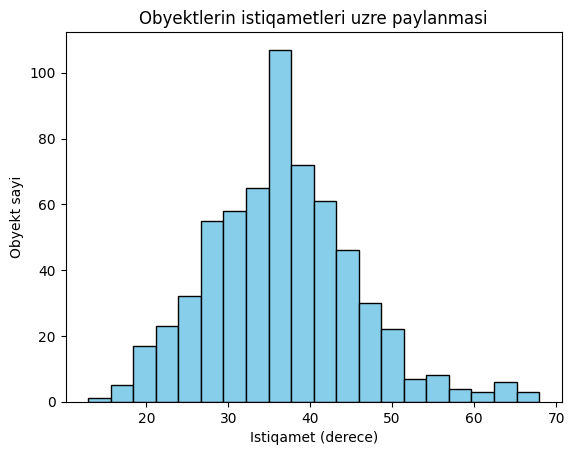

In [98]:
# Obyektlerin daha cox simala, cenuba ve ya serqe, qerbe istiqametli olub-olmadigini mueyyen ede bilerik.
# Bu, seher planlasdirilmasi ve muhendislik  baximindan maraqli ola biler
import numpy as np

def get_orientation(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    width = maxx - minx
    height = maxy - miny
    return np.arctan(height / width) * 180 / np.pi  # Dərəcə ilə

data['orientation'] = data.geometry.apply(get_orientation)

plt.hist(data['orientation'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Istiqamet (derece)")
plt.ylabel("Obyekt sayi")
plt.title("Obyektlerin istiqametleri uzre paylanmasi")
plt.show()

In [101]:
# Yaxinliq (Nearest Neighbor) Analizi
# Bu analiz her obyektin  ona en yaxin olan diger obyekt ile mesafesini hesablayir
from scipy.spatial import distance_matrix

# Koordinatlari tapiriq
coords = data.geometry.centroid.apply(lambda geom: (geom.x, geom.y)).to_list()

# Mesafe matrisini hesablayiriq
dist_matrix = distance_matrix(coords, coords)

# Her obyekt ucun en yaxin obyekti tapiriq
np.fill_diagonal(dist_matrix, np.inf)  # Ozune olan mesafeni cixaririq
data['nearest_distance'] = dist_matrix.min(axis=1)

print("En yaxin obyekte olan mesafe:", data['nearest_distance'].mean())

En yaxin obyekte olan mesafe: 0.027535658685412977


<ipython-input-101-61ddfedb1c29>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = data.geometry.centroid.apply(lambda geom: (geom.x, geom.y)).to_list()


<ipython-input-104-ebbc1d4c693f>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.scatter(data.geometry.centroid.x, data.geometry.centroid.y, c=data['nearest_distance'], cmap='coolwarm', edgecolors='black')


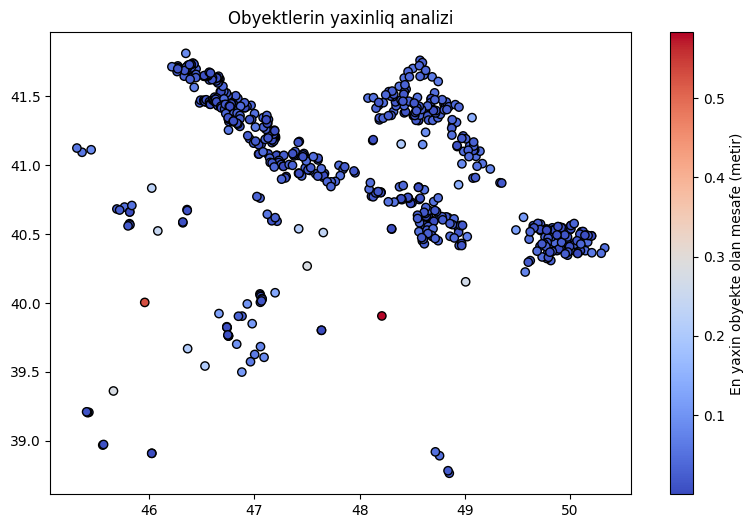

In [104]:
# Vizulladiraq
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(ax=ax, color='blue', edgecolor='black', alpha=0.6)
plt.scatter(data.geometry.centroid.x, data.geometry.centroid.y, c=data['nearest_distance'], cmap='coolwarm', edgecolors='black')
plt.colorbar(label="En yaxin obyekte olan mesafe (metir)")
plt.title("Obyektlerin yaxinliq analizi")
plt.show()

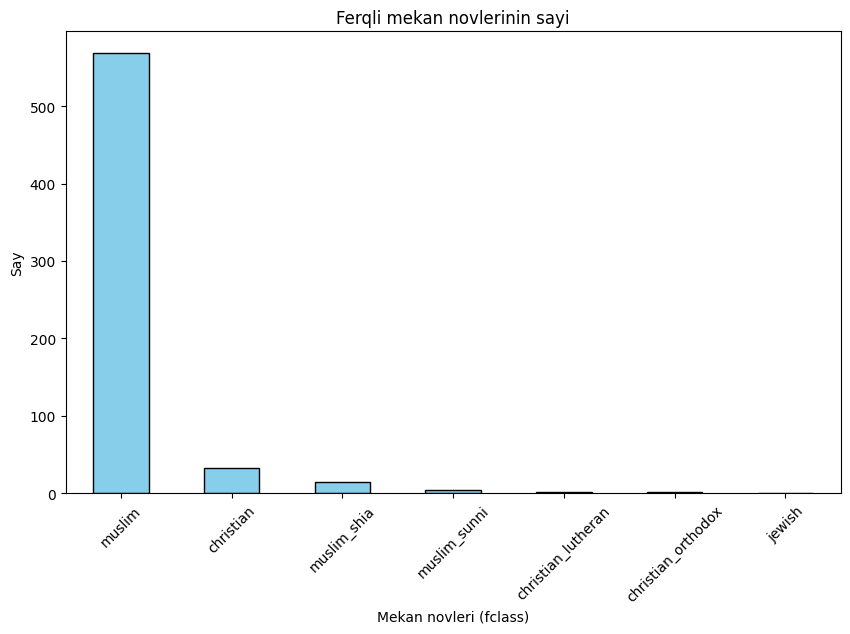

In [107]:
import matplotlib.pyplot as plt

# Her fclass kateqoriyasinin sayini hesabla
fclass_counts = data['fclass'].value_counts()

plt.figure(figsize=(10, 6))
fclass_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Mekan novleri (fclass)")
plt.ylabel("Say")
plt.title("Ferqli mekan novlerinin sayi")
plt.xticks(rotation=45)
plt.show()

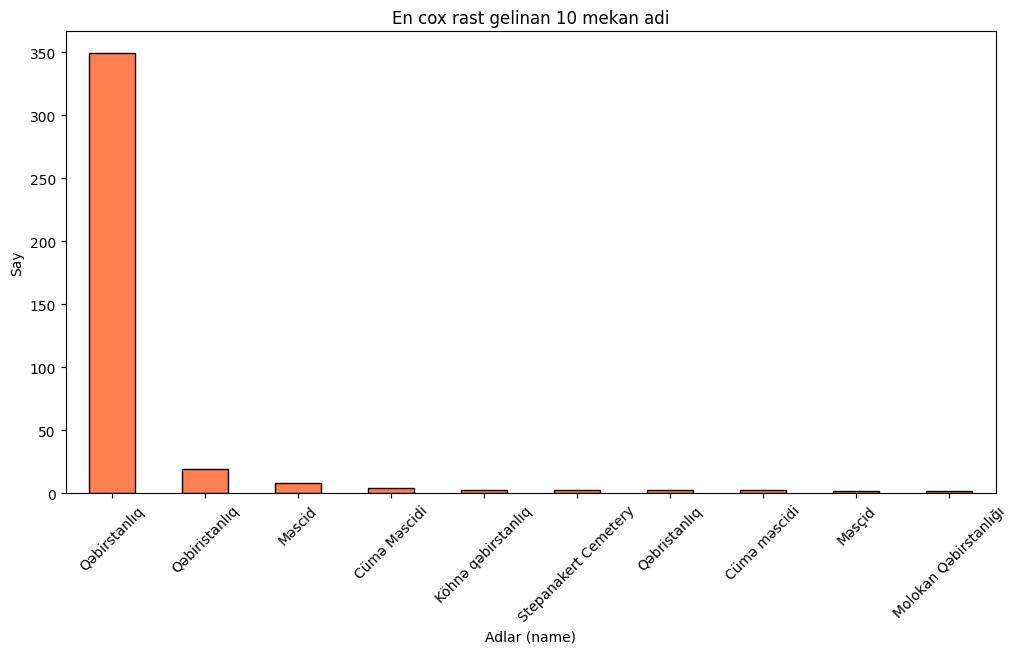

In [109]:
# Heər unique `name` deyerinin sayini  hesabla
name_counts = data['name'].value_counts()

# en cox rast gelinen 10 adi gosterek
top_names = name_counts[:10]

# Çubuq qrafiki ilə vizuallaşdır
plt.figure(figsize=(12, 6))
top_names.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel("Adlar (name)")
plt.ylabel("Say")
plt.title("En cox rast gelinan 10 mekan adi")
plt.xticks(rotation=45)
plt.show()


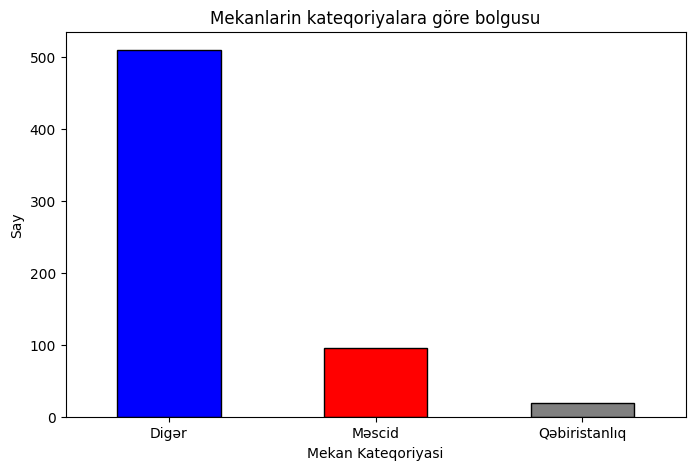

In [111]:
# Mescid ve qebiristanliqlari ayirmaq ucun funksiya
def categorize_name(name):
    name = name.lower()
    if "məscid" in name:
        return "Məscid"
    elif "qəbiristanlıq" in name:
        return "Qəbiristanlıq"
    else:
        return "Digər"

# Yeni kateqoriya sutunu elave et
data["category"] = data["name"].apply(categorize_name)

# Her kateqoriyanin sayini hesabla
category_counts = data["category"].value_counts()


plt.figure(figsize=(8, 5))
category_counts.plot(kind="bar", color=["blue", "red", "gray"], edgecolor="black")
plt.xlabel("Mekan Kateqoriyasi")
plt.ylabel("Say")
plt.title("Mekanlarin kateqoriyalara göre bolgusu")
plt.xticks(rotation=0)
plt.show()


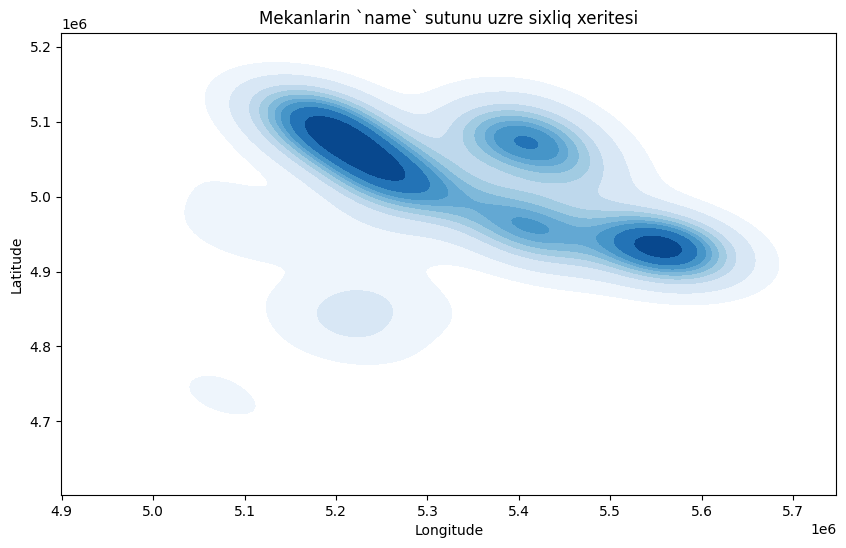

In [117]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


data = data.to_crs(epsg=3857)  # WGS 84 / Pseudo-Mercator (EPSG:3857)

# Centroid koordinantlarini cixaririq
data["centroid_x"] = data.geometry.centroid.x
data["centroid_y"] = data.geometry.centroid.y

# Sixliq xeitesini vizuallasdiriiq
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="centroid_x", y="centroid_y", cmap="Blues", fill=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mekanlarin `name` sutunu uzre sixliq xeritesi")
plt.show()
